In [41]:
import os
import sys
import pandas as pd
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
import transformers
import seaborn as sb
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
# print(transformers.__version__)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [42]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [43]:
cleaned= pd.read_csv('data/cleaned_bank_reviews.csv')

In [44]:
cleaned.shape

(8984, 5)

In [45]:
cleaned.head()

,app_id,userName,score,content,at
0,com.combanketh.mobilebanking,A Google user,2,The CBE app has been highly unreliable in rece...,2025-05-25
1,com.combanketh.mobilebanking,A Google user,4,"this new update(Mar 19,2025) is great in fixin...",2025-03-20
2,com.combanketh.mobilebanking,A Google user,5,Good job to the CBE team on this mobile app! I...,2025-04-04
3,com.combanketh.mobilebanking,A Google user,5,this app has developed in a very good ways but...,2025-05-31
4,com.combanketh.mobilebanking,A Google user,1,everytime you uninstall the app you have to re...,2025-06-04


In [20]:
cleaned['content'].values[0]

'The CBE app has been highly unreliable in recent weeks. It frequently fails to work properly on both Ethio Telecom and Safaricom networks, whether using Wi-Fi or mobile data. This week, the system was down entirely for extended periods, making it very difficult to access banking services. The app only functions intermittently, and the lack of consistency is frustrating. I hope the issues are addressed soon, and that any non-technical influences are removed from such essential services.'

In [21]:
cleaned['score'].value_counts()

score
5    5651
1    1577
4     842
3     545
2     369
Name: count, dtype: int64

# Basic NLTK

In [22]:
example = cleaned['content'][50]
print(example)

This app has several issues based on my experience. Below are the problems that I encountered: 1. The app frequently crashes. 2. It only shows a limited transaction record history (25 transactions). 3. You can't access the transaction records after 8:00 pm and on Sundays. 4. It displays a "payment failed" message. It would be greatly appreciated if you could address these issues


In [10]:
nltk.word_tokenize(example)

['This',
 'app',
 'has',
 'several',
 'issues',
 'based',
 'on',
 'my',
 'experience',
 '.',
 'Below',
 'are',
 'the',
 'problems',
 'that',
 'I',
 'encountered',
 ':',
 '1',
 '.',
 'The',
 'app',
 'frequently',
 'crashes',
 '.',
 '2',
 '.',
 'It',
 'only',
 'shows',
 'a',
 'limited',
 'transaction',
 'record',
 'history',
 '(',
 '25',
 'transactions',
 ')',
 '.',
 '3',
 '.',
 'You',
 'ca',
 "n't",
 'access',
 'the',
 'transaction',
 'records',
 'after',
 '8:00',
 'pm',
 'and',
 'on',
 'Sundays',
 '.',
 '4',
 '.',
 'It',
 'displays',
 'a',
 '``',
 'payment',
 'failed',
 "''",
 'message',
 '.',
 'It',
 'would',
 'be',
 'greatly',
 'appreciated',
 'if',
 'you',
 'could',
 'address',
 'these',
 'issues']

In [23]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'app',
 'has',
 'several',
 'issues',
 'based',
 'on',
 'my',
 'experience',
 '.']

In [24]:
# part of speach
tagged= nltk.pos_tag(tokens) 
tagged[:10]

[('This', 'DT'),
 ('app', 'NN'),
 ('has', 'VBZ'),
 ('several', 'JJ'),
 ('issues', 'NNS'),
 ('based', 'VBN'),
 ('on', 'IN'),
 ('my', 'PRP$'),
 ('experience', 'NN'),
 ('.', '.')]

In [13]:
entities = nltk.ne_chunk(tagged)
entities.pprint()

LookupError: 
**********************************************************************
  Resource [93mmaxent_ne_chunker_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('maxent_ne_chunker_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mchunkers/maxent_ne_chunker_tab/english_ace_multiclass/[0m

  Searched in:
    - 'C:\\Users\\girmachew/nltk_data'
    - 'c:\\Users\\girmachew\\B5W2-Customer-Experience-Analytics-for-Fintech-Apps\\venv\\nltk_data'
    - 'c:\\Users\\girmachew\\B5W2-Customer-Experience-Analytics-for-Fintech-Apps\\venv\\share\\nltk_data'
    - 'c:\\Users\\girmachew\\B5W2-Customer-Experience-Analytics-for-Fintech-Apps\\venv\\lib\\nltk_data'
    - 'C:\\Users\\girmachew\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores("Thi is the worst thing ever")

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.117, 'neu': 0.83, 'pos': 0.053, 'compound': -0.5118}

In [ ]:
sia.polarity_scores(cleaned['content'][1000])

{'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.8449}

In [ ]:
cleaned['content'][1000]

'Good features. And really very fast..! Amazing from CBE...!!'

In [ ]:
cleaned.head()

,app_id,userName,score,content,at
0,com.combanketh.mobilebanking,A Google user,2,The CBE app has been highly unreliable in rece...,2025-05-25
1,com.combanketh.mobilebanking,A Google user,4,"this new update(Mar 19,2025) is great in fixin...",2025-03-20
2,com.combanketh.mobilebanking,A Google user,5,Good job to the CBE team on this mobile app! I...,2025-04-04
3,com.combanketh.mobilebanking,A Google user,5,this app has developed in a very good ways but...,2025-05-31
4,com.combanketh.mobilebanking,A Google user,1,everytime you uninstall the app you have to re...,2025-06-04


In [ ]:
res = {}
for i, row in tqdm(cleaned.iterrows(), total = len(cleaned)):
    content = row['content']
    app_id = ['app_id']
    res['app_id'] = sia.polarity_scores(content)
    break


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
res

{}

In [ ]:
#print(sys.executable)

In [25]:
from scripts.SentimentAnalysis import SentimentAnalysis

obj = SentimentAnalysis()



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\girmachew\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Device set to use cpu


In [26]:
# Load  cleaned CSV
df = pd.read_csv("data/final_bank_reviews.csv")
df.columns

Index(['review', 'rating', 'date', 'bank', 'source'], dtype='object')

In [ ]:
results = obj.extract_emoji_and_non_english(df)

In [ ]:
print("Reviews with Emojis by Bank:")
display(results['emoji'])

print("Non-English Reviews by Bank:")
display(results['non_english'])

Reviews with Emojis by Bank:


NameError: name 'results' is not defined

# VADER

In [46]:
from scripts.SentimentAnalysis import SentimentAnalysis
sa = SentimentAnalysis(method="vader")
df = pd.read_csv("data/all_bank_reviews.csv")
df.columns

Index(['app_id', 'userName', 'score', 'content', 'at'], dtype='object')

In [28]:
# sentiment analysis
df = sa.add_sentiment_column(df, text_col='content')

In [29]:
df['content'][1000]

'Good features. And really very fast..! Amazing from CBE...!!'

In [30]:
nltk.word_tokenize(df['content'][1000])

['Good',
 'features',
 '.',
 'And',
 'really',
 'very',
 'fast',
 '..',
 '!',
 'Amazing',
 'from',
 'CBE',
 '...',
 '!',
 '!']

In [31]:
df.columns

Index(['app_id', 'userName', 'score', 'content', 'at', 'cleaned_review',
       'sentiment'],
      dtype='object')

In [32]:
df.head()

,app_id,userName,score,content,at,cleaned_review,sentiment
0,com.combanketh.mobilebanking,A Google user,2,The CBE app has been highly unreliable in rece...,2025-05-25 10:54:25,cbe app highly unreliable recent week frequent...,negative
1,com.combanketh.mobilebanking,A Google user,4,"this new update(Mar 19,2025) is great in fixin...",2025-03-20 15:11:38,new update mar great fixing bug stability smoo...,positive
2,com.combanketh.mobilebanking,A Google user,5,Good job to the CBE team on this mobile app! I...,2025-04-04 22:18:47,good job cbe team mobile app designed way simp...,positive
3,com.combanketh.mobilebanking,A Google user,5,this app has developed in a very good ways but...,2025-05-31 21:21:18,app developed good way comment need make preve...,positive
4,com.combanketh.mobilebanking,A Google user,1,everytime you uninstall the app you have to re...,2025-06-04 21:33:36,everytime uninstall app reach physically oldy ...,neutral


In [33]:
df['sentiment']

0       negative
1       positive
2       positive
3       positive
4        neutral
          ...   
8986     neutral
8987     neutral
8988     neutral
8989     neutral
8990     neutral
Name: sentiment, Length: 8991, dtype: object

In [34]:
agg = sa.aggregate_sentiment(df)
print(agg.head(15))

sentiment                        app_id  score  negative  neutral  positive
0              com.boa.boaMobileBanking      1       175      157        90
1              com.boa.boaMobileBanking      2        11       25        16
2              com.boa.boaMobileBanking      3         8       35        22
3              com.boa.boaMobileBanking      4         2       27        19
4              com.boa.boaMobileBanking      5         5      299       154
5          com.combanketh.mobilebanking      1       328      526       268
6          com.combanketh.mobilebanking      2        66      136        98
7          com.combanketh.mobilebanking      3        49      224       197
8          com.combanketh.mobilebanking      4        35      326       410
9          com.combanketh.mobilebanking      5        42     2821      1972
10            com.dashen.dashensuperapp      1         6       11        17
11            com.dashen.dashensuperapp      2         4        7         6
12          

# TextBlob

In [47]:
sa = SentimentAnalysis(method="textblob")
df = pd.read_csv("data/all_bank_reviews.csv")
df.columns

Index(['app_id', 'userName', 'score', 'content', 'at'], dtype='object')

In [37]:
# sentiment analysis
df = sa.add_sentiment_column(df, text_col='content')

In [38]:
agg = sa.aggregate_sentiment(df)
print(agg.head(15))

sentiment                        app_id  score  negative  neutral  positive
0              com.boa.boaMobileBanking      1       141      207        74
1              com.boa.boaMobileBanking      2        12       30        10
2              com.boa.boaMobileBanking      3         8       37        20
3              com.boa.boaMobileBanking      4         1       28        19
4              com.boa.boaMobileBanking      5         6      315       137
5          com.combanketh.mobilebanking      1       237      671       214
6          com.combanketh.mobilebanking      2        46      170        84
7          com.combanketh.mobilebanking      3        22      269       179
8          com.combanketh.mobilebanking      4        21      373       377
9          com.combanketh.mobilebanking      5        29     2951      1855
10            com.dashen.dashensuperapp      1         8       16        10
11            com.dashen.dashensuperapp      2         5        8         4
12          

In [40]:
sa = SentimentAnalysis(method="textblob")
df = sa.add_sentiment_column(df, text_col="content")

# Now extract top keywords or n-grams (e.g., bigrams)
keywords_df = sa.extract_keywords_tfidf_by_app(df, top_n=30, ngram_range=(2, 3))
# print(keywords_df)
for app_id, group in keywords_df.groupby('app_id'):
    print(f"\nTop Keywords for App ID: {app_id}")
    print(group[['term', 'score']].sort_values(by='score', ascending=False).to_string(index=False))



Top Keywords for App ID: com.boa.boaMobileBanking
                term     score
            good app 15.225946
           worst app  7.700130
      mobile banking  7.644543
         banking app  6.708661
    developer option  4.825487
             bad app  4.786880
            best app  4.497425
  mobile banking app  3.806520
          worest app  3.627921
            app work  3.625569
            easy use  3.569135
    good application  3.420261
           great app  3.404993
         useless app  3.399933
        worst mobile  2.961907
         app working  2.834590
             use app  2.783968
    working properly  2.765258
worst mobile banking  2.690025
           best bank  2.609616
            nice app  2.557715
        good service  2.538810
          boa mobile  2.224539
   worst application  2.130175
   worst banking app  2.067258
       worst banking  2.067258
   disable developer  2.058817
         working day  2.028073
            app seen  2.014440
           great bo

C:\Users\girmachew\AppData\Local\Temp\ipykernel_1780\3680674593.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='score', y='term', data=app_keywords, palette='viridis')


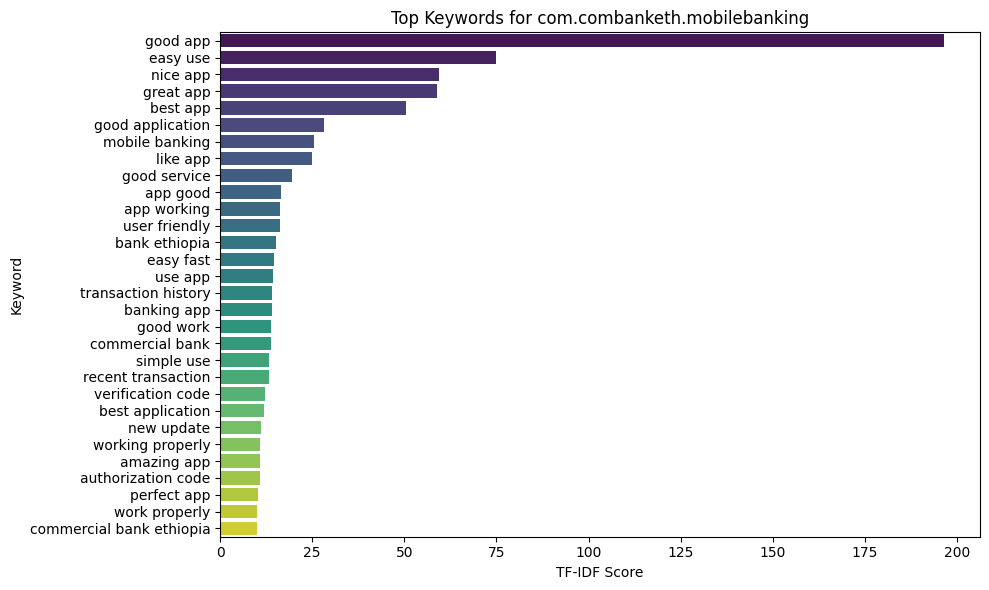

In [48]:
app_id = 'com.combanketh.mobilebanking'
app_keywords = keywords_df[keywords_df['app_id'] == app_id].sort_values(by='score', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='score', y='term', data=app_keywords, palette='viridis')
plt.title(f'Top Keywords for {app_id}')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

C:\Users\girmachew\AppData\Local\Temp\ipykernel_1780\621750921.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='score', y='term', data=app_keywords, palette='viridis')


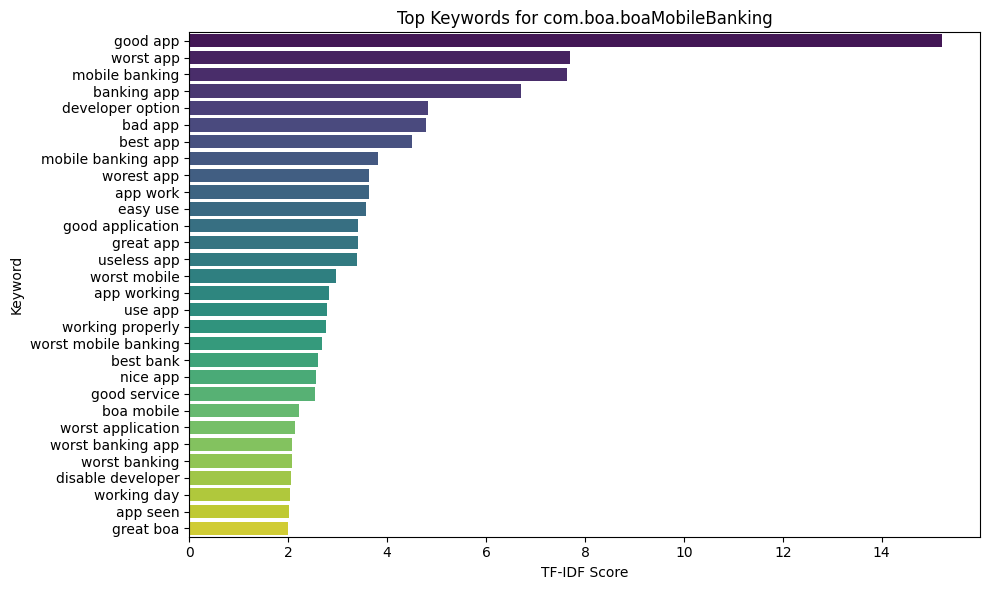

In [49]:
app_id = 'com.boa.boaMobileBanking'
app_keywords = keywords_df[keywords_df['app_id'] == app_id].sort_values(by='score', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='score', y='term', data=app_keywords, palette='viridis')
plt.title(f'Top Keywords for {app_id}')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()

C:\Users\girmachew\AppData\Local\Temp\ipykernel_1780\3378458790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='score', y='term', data=app_keywords, palette='viridis')


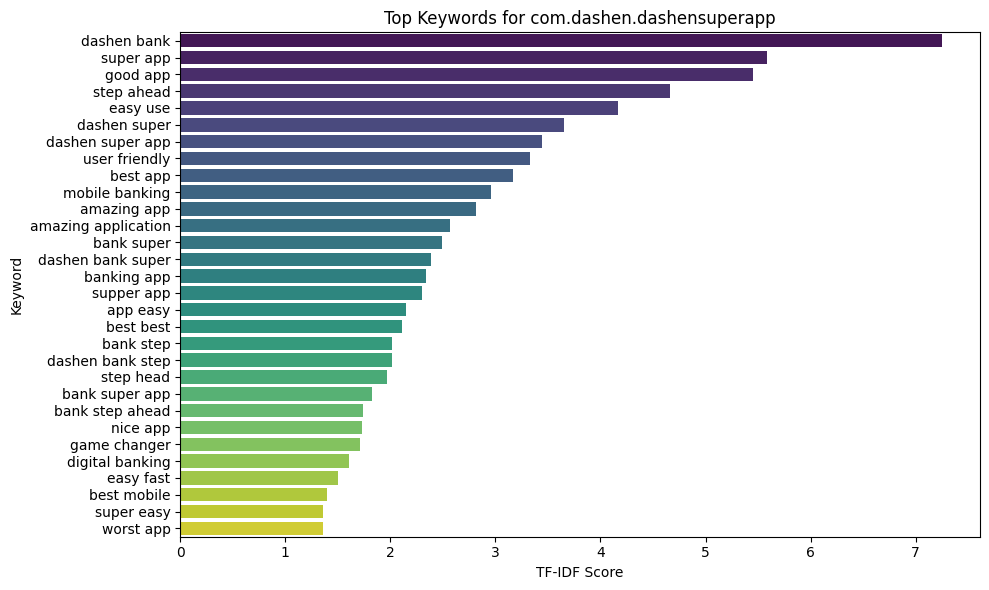

In [50]:
app_id = 'com.dashen.dashensuperapp'
app_keywords = keywords_df[keywords_df['app_id'] == app_id].sort_values(by='score', ascending=False)

plt.figure(figsize=(10, 6))
sb.barplot(x='score', y='term', data=app_keywords, palette='viridis')
plt.title(f'Top Keywords for {app_id}')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()